<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gathering-data" data-toc-modified-id="Gathering-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gathering data</a></span></li><li><span><a href="#Preparing-the-data---cleaning-and-exploration" data-toc-modified-id="Preparing-the-data---cleaning-and-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing the data - cleaning and exploration</a></span><ul class="toc-item"><li><span><a href="#Title-column" data-toc-modified-id="Title-column-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Title column</a></span></li><li><span><a href="#Age-column" data-toc-modified-id="Age-column-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Age column</a></span></li><li><span><a href="#Fare-column" data-toc-modified-id="Fare-column-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fare column</a></span></li><li><span><a href="#Sex-column" data-toc-modified-id="Sex-column-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sex column</a></span></li><li><span><a href="#Embarked-column" data-toc-modified-id="Embarked-column-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Embarked column</a></span></li><li><span><a href="#FamilySize-and-IsAlone-columns" data-toc-modified-id="FamilySize-and-IsAlone-columns-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>FamilySize and IsAlone columns</a></span></li><li><span><a href="#Cabin-column" data-toc-modified-id="Cabin-column-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Cabin column</a></span></li><li><span><a href="#Select-features" data-toc-modified-id="Select-features-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Select features</a></span></li></ul></li><li><span><a href="#Choosing-a-model" data-toc-modified-id="Choosing-a-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choosing a model</a></span></li><li><span><a href="#Training-models" data-toc-modified-id="Training-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training models</a></span></li><li><span><a href="#Evaluating-models" data-toc-modified-id="Evaluating-models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating models</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Tuning-with-RandomizedSearchCV" data-toc-modified-id="Tuning-with-RandomizedSearchCV-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Tuning with RandomizedSearchCV</a></span></li><li><span><a href="#Tuning-with-GridSearchCV" data-toc-modified-id="Tuning-with-GridSearchCV-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Tuning with GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>GradientBoostingClassifier</a></span></li><li><span><a href="#XGBClassifier" data-toc-modified-id="XGBClassifier-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>XGBClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Making Predictions</a></span></li></ul></div>

# Gathering data

In [122]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pyplot import plot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined = [train_df,test_df]
combined_df = pd.concat(combined, sort=False)

# Preparing the data - cleaning and exploration

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Age is partially missing so we will fill it with some values.  
Cabin is mainly missing so we won't use it as a feature.

## Title column

In [6]:
def create_title_column(dataframe):
    dataframe['Title'] = dataframe['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataframe['Title'] = dataframe['Title'].replace('Mlle', 'Miss')
    dataframe['Title'] = dataframe['Title'].replace('Ms', 'Miss')
    dataframe['Title'] = dataframe['Title'].replace('Mme', 'Mrs')
    
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (dataframe['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataframe['Title'] = dataframe['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    print(dataframe['Title'].value_counts())
    return pd.Categorical(dataframe['Title']).codes

In [7]:
for df in combined:
    df['Title'] = create_title_column(df)

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Misc        6
Name: Title, dtype: int64


## Age column

In [8]:
mean_age_by_pclass = combined_df.groupby('Pclass').mean()['Age']
mean_age_by_pclass

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [9]:
def compute_age(row):
    if pd.isnull(row['Age']):
        return mean_age_by_pclass[row['Pclass']]
    return row['Age']

In [10]:
for df in combined:
    df["Age"] = df.apply(compute_age, axis=1)

In [11]:
def get_quantile_based_boundaries(feature_values, num_buckets):
  boundaries = np.arange(1.0, num_buckets) / num_buckets
  quantiles = feature_values.quantile(boundaries)
  return [quantiles[q] for q in quantiles.keys()]

In [12]:
for df in combined:
    df['IsChild'] = df['Age']<15

In [13]:
def compute_band(row, column_name, boundaries):
    i=0
    for boundary in boundaries:
        if row[column_name] < boundary:
            return i
        i=i+1
    return len(boundaries)

In [14]:
for i in np.arange(3, 6):
    age_boundaries = get_quantile_based_boundaries(combined_df.Age, i)
    for df in combined:
        df["Age_band_" + str(i)] = df.apply(lambda row : compute_band(row, 'Age', age_boundaries), axis=1)

C:\Users\lange\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


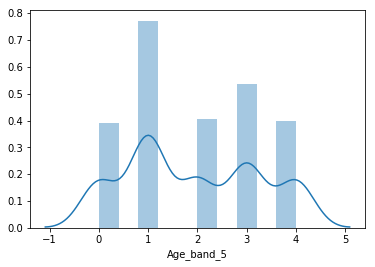

In [15]:
sns.distplot(train_df.Age_band_5)

## Fare column

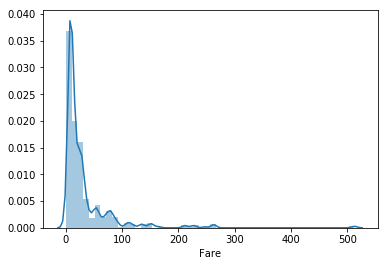

In [16]:
sns.distplot(train_df.Fare)

There's one missing fare, so we'll fill it with the mean fare given Pclass. 

In [17]:
missing_fare = test_df[test_df['Fare'].isna()]
missing_fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsChild,Age_band_3,Age_band_4,Age_band_5
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,3,False,2,3,4


In [18]:
fare_groupby_pclass = combined_df.groupby('Pclass').mean()['Fare']
fare_groupby_pclass

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [19]:
mean_fare_for_Pclass3 = fare_groupby_pclass.loc[missing_fare.iloc[0].Pclass]
test_df['Fare'].fillna(mean_fare_for_Pclass3, inplace=True)

We will create 5 bands of Fare

In [20]:
for i in np.arange(3, 6):
    fare_boundaries = get_quantile_based_boundaries(combined_df.Fare, i)
    for df in combined:
        df["Fare_band_" + str(i)] = df.apply(lambda row : compute_band(row, 'Fare', fare_boundaries), axis=1)

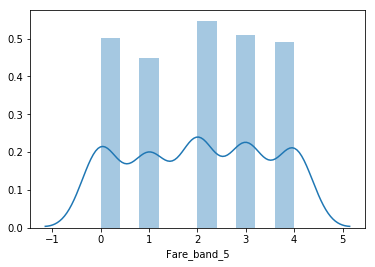

In [21]:
sns.distplot(train_df.Fare_band_5)

## Sex column

Convert sex column to be numerical

In [22]:
for df in combined:
    df.Sex = pd.get_dummies(df.Sex, drop_first=True)

In [23]:
train_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Embarked column

First fill empty values with the most frequent embarked.
Then convert the column to be numerical

In [24]:
freq_port = df.Embarked.dropna().mode()[0]

for df in combined:
    df.Embarked.fillna(freq_port, inplace=True)
    df.Embarked = pd.Categorical(df.Embarked).codes

In [25]:
train_df.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

## FamilySize and IsAlone columns

In [26]:
for df in combined:
    df['FamilySize'] = df.SibSp + df.Parch + 1
    df['IsAlone'] = ((df.SibSp + df.Parch)==0)*1

## Cabin column

In [27]:
import re
def extract_cabin_nr(cabin):
    """ Extracts the cabin number.  If there no number found, return NaN """
    if not pd.isnull(cabin):
        cabin = cabin.split(' ')[-1]    # if several cabins on ticket, take last one
        re_numb = r'[A-Z]([0-9]+)'
        try:
            number = int(re.findall(re_numb, cabin)[0])
            return number
        except:
            return np.nan
    else:
        return np.nan

In [28]:
def extract_cabin_letter(cabin):
    """ Extracts the cabin letter.  If there no letter found, return NaN """
    if not pd.isnull(cabin):
        cabin = cabin.split(' ')[-1]    # if several cabins on ticket, take last one
        re_char = r'([A-Z])[0-9]+'
        try:
            character = re.findall(re_char, cabin)[0]
            return character
        except:
            return np.nan
    else:
        return np.nan

In [29]:
for df in combined:
    df['Cabin_char'] = list(map(extract_cabin_letter, df['Cabin']))
    df['Cabin_nr'] = list(map(extract_cabin_nr, df['Cabin']))
    df['Cabin_nr_odd'] = df.Cabin_nr.apply(lambda x: np.nan if x == np.nan else x%2)
    
    # deal with the NaN's in some of our newly created columns
    df['Cabin_char'].fillna(value=-9999, inplace=True)
    df['Cabin_nr'].fillna(value=-9999, inplace=True)
    df['Cabin_nr_odd'].fillna(value=-9999, inplace=True)

In [30]:
train_df = train_df.drop(['Name','Cabin','Ticket','Fare','Age'], 1)
#train_df.Cabin_char.value_counts


In [31]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band_3,Age_band_4,...,IsAlone,Cabin_nr,Cabin_nr_odd,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,1.536476,2.747475,1.056117,1.499439,...,0.602694,-7743.141414,-7754.454545,0.016835,0.052750,0.066218,0.03367,0.037037,0.010101,0.007856
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.791503,0.890765,0.756392,1.058274,...,0.489615,4195.494912,4174.421322,0.128725,0.223659,0.248802,0.18048,0.188959,0.100051,0.088337
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,0.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,...,1.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,...,1.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,2.000000,3.000000,...,1.000000,148.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Select features

In [33]:
X = np.array(train_df.drop(['Survived','PassengerId'], 1))
training_features = np.array(train_df.drop(['Survived','PassengerId'], 1).columns)
#X = preprocessing.scale(X)  --- not needed for XGboost?
y = np.array(train_df['Survived'])

In [120]:
from sklearn import model_selection
import xgboost as xgb

clf = xgb.XGBClassifier(verbose=1)
#for i in np.arange(3, 21):
cv = model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
scores = model_selection.cross_val_score(clf, X, y, cv=cv, n_jobs=-1, scoring='accuracy', verbose=1)
clf.fit(X,y)
print('n_split=' + str(i))
print(scores)
print('Accuracy: %.3f stdev: %.3f' % (np.mean(np.abs(scores)), np.std(scores)))
print()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


n_split=1
[0.85234899 0.83892617 0.82550336 0.87162162 0.83108108 0.80405405]
Accuracy: 0.837 stdev: 0.021



In [99]:
from sklearn.feature_selection import RFECV

print("features used during training: ")
print(training_features)
print("")

featselect = RFECV(estimator=clf, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
featselect.fit(X,y)

print("features proposed by RFECV: "),
print(training_features[featselect.support_])

features used during training: 
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Title' 'IsChild' 'Age_band_3'
 'Age_band_4' 'Age_band_5' 'Fare_band_3' 'Fare_band_4' 'Fare_band_5'
 'FamilySize' 'IsAlone' 'Cabin_nr' 'Cabin_nr_odd' 'Cabin_char_A'
 'Cabin_char_B' 'Cabin_char_C' 'Cabin_char_D' 'Cabin_char_E'
 'Cabin_char_F' 'Cabin_char_G']

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
features proposed by RFECV: 
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Title' 'IsChild' 'Age_band_3'
 'Age_band_4' 'Age_band_5' 'Fare_band_3' 'Fare_band_4' 'Fare_band_5'
 'FamilySize' 'Cabin_nr' 'Cabin_nr_odd' 'Cabin_char_A' 'Cabin_char_B'
 'Cabin_char_C' 'Cabin_char_D' 'Cabin_char_E']


In [40]:
#features = ['Pclass', 'Sex', 'Age', 'IsAlone', 'Fare', 'Embarked', 'Title', 'Cabin_nr']
features = ['Pclass','Sex', 'IsChild', 'Age_band_5', 'Fare_band_4', 'Fare_band_5', 'Title', 'FamilySize', 'Cabin_nr']

# Choosing a model

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [44]:
n_estimators = [10,50,100,200,400]
n_neighbors = [3,4,5,6]
learning_rates = [1.0, 0.3, 0.1, 0.03, 0.01, 0.005, 0.003]
criterion = ['gini', 'entropy']
max_features = ['log2', 'sqrt','auto']
hidden_layer_sizes = [(100,), (100,100), (50,100,50)]
C = [0.1, 1, 3, 10, 30, 100]
gamma = [1, 0.3, 0.1, 0.03, 0.01, 0.001]
max_depth = [2, 3, 4]
reg_lambda = [0.50]
loss = ['deviance', 'exponential']

models_and_grid_params = [
    #(SGDClassifier, {'penalty': ['l2', 'l1']}),
    (xgb.XGBClassifier, {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 'reg_lambda': reg_lambda}),
    (AdaBoostClassifier, {'n_estimators': n_estimators, 'learning_rate': learning_rates}),
    #(ExtraTreesClassifier, {'n_estimators': n_estimators}),
    (GradientBoostingClassifier,{'loss': loss, 'learning_rate': learning_rates}), 
    (RandomForestClassifier, {'n_estimators': n_estimators, 'criterion': criterion,'max_features': max_features}),
    #(KNeighborsClassifier, {'n_neighbors': n_neighbors}),
    #(MLPClassifier,{'hidden_layer_sizes': hidden_layer_sizes}),
                   #(SVC,{'C': C, 'gamma': gamma}),
                   #(GaussianProcessClassifier,{}),
                   (DecisionTreeClassifier,{})
                   #(GaussianNB,{})
                   ]

scores = pd.DataFrame(columns=['Model', 'Estimator', 'Trial', 'Best Params', 'Accuracy Score'])

# Training models

Split training data into random train (60%) and test subsets (40%)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df['Survived'], test_size=0.4, random_state=42)

Define train_model function that will create a given model, and search for the best parameters across a given param_grid.
It appends the results to the scores dataframe for later evaluation.

In [53]:
def train_model(estimator_class, param_grid, scores, X_train, X_test, y_train, y_test, verbose=0):
    estimator = estimator_class()
    
    if verbose==1:
        print('Training ' + type(estimator).__name__ + '...')
    
    
    cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    model = GridSearchCV(estimator, param_grid, refit=True, cv=cv, scoring='accuracy', verbose=verbose, n_jobs=-1)
    model.fit(X_train,y_train)
    #pred = model.predict(X_test)
    
    #accuracy = round(model.score(X_test, y_test) * 100, 3)
    trial_row = scores[scores['Model']==type(estimator).__name__]
    trial = 1
    if not trial_row.empty:
        trial = int(trial_row['Trial'].max()) + 1
    scores = scores.append({'Model' : type(estimator).__name__, 
                            'Estimator' : model.best_estimator_, 
                            'Trial': trial,
                            'Best Params': str(model.best_params_),
                            'Accuracy Score': round(model.best_score_*100,3) #accuracy
                           }, ignore_index=True)
    
    return scores, model.best_estimator_, model.best_params_, round(model.best_score_*100,3)

In [47]:
def print_results(model, params, accuracy, scores=None):
    print(type(model).__name__ + ' works best (' + str(accuracy) + '%) with ' + str(params))
    if not scores is None:
        scores = scores.sort_values('Accuracy Score', ascending=False)
    return scores

Now let's train all the models:

In [867]:
for model_class, param_grid in models_and_grid_params:
    scores, best_model, best_params, accuracy = train_model(model_class, param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)
    print_results(best_model, best_params, accuracy)

Training XGBClassifier...
Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   14.0s finished


XGBClassifier works best (85.019%) with {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 400, 'reg_lambda': 0.5}
Training AdaBoostClassifier...
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   14.4s finished


AdaBoostClassifier works best (84.082%) with {'learning_rate': 0.1, 'n_estimators': 200}
Training GradientBoostingClassifier...
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:    8.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    8.2s finished


GradientBoostingClassifier works best (85.019%) with {'learning_rate': 0.03, 'loss': 'exponential'}
Training RandomForestClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.5s finished


RandomForestClassifier works best (83.333%) with {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}
Training DecisionTreeClassifier...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s


DecisionTreeClassifier works best (81.648%) with {}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


# Evaluating models

The dataframe below shows the best results for the trained models, with the highest score on top.

In [868]:
def print_scores(scores):
    return scores.sort_values('Accuracy Score', ascending=False)

In [869]:
print_scores(scores)

,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",85.019
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",85.019
1,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'learning_rate': 0.1, 'n_estimators': 200}",84.082
3,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'criterion': 'entropy', 'max_features': 'log2...",83.333
4,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",1,{},81.648


# Hyperparameter Tuning

## Tuning with RandomizedSearchCV

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]}


In [446]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbo

In [447]:
print('The best parameters after tuning are: ')
print()
pprint(rf_random.best_params_)

print()
best_model = rf_random.best_estimator_
old_score = float(scores[scores['Model']==type(best_model).__name__]['Accuracy Score'])
rf_random_score = round(best_model.score(X_test, y_test) * 100, 2)
print('Final Score on validation data: ' + str(rf_random_score) + '% (+' + str(round(rf_random_score-old_score,2)) + '%)')

The best parameters after tuning are: 

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 900}

Final Score on validation data: 81.51% (+1.12%)


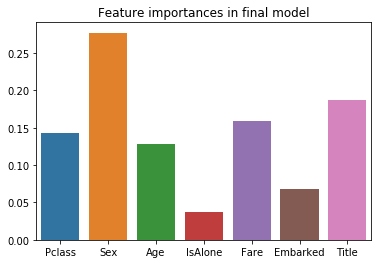

In [448]:
feature_importances_df = pd.DataFrame(best_model.feature_importances_).transpose()
feature_importances_df.columns = features
axes = sns.barplot(data=feature_importances_df)
_ = axes.set_title('Feature importances in final model')

## Tuning with GridSearchCV

### GradientBoostingClassifier

In [687]:
learning_rates = [0.12, 0.11, 0.1, 0.09, 0.08]
max_depth = [3,5,8]
loss = ['deviance', 'exponential']

tuned_param_grid = {'learning_rate': learning_rates, 'loss': loss, 'max_depth': max_depth,
    "min_samples_split": np.linspace(0.1, 0.5, 6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]}


In [688]:
scores, gb_tuned, gb_tuned_params, gb_accuracy = train_model(GradientBoostingClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training GradientBoostingClassifier...
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1539 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 2939 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 4739 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 6939 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 9539 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 11731 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 13431 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 15331 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 17431 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 19731 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 21585 out of 21600 | elapsed:  5.3min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 21600 out of 21600 | elapsed:  5.3min finished


In [689]:
print_results(gb_tuned, gb_tuned_params, gb_accuracy, scores)

GradientBoostingClassifier works best (83.146%) with {'criterion': 'friedman_mse', 'learning_rate': 0.12, 'loss': 'exponential', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.26}


,Model,Estimator,Trial,Best Params,Best Score,Accuracy Score
19,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",4,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",84.27,84.270
6,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",84.228,84.228
7,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",2,"{'bootstrap': True, 'criterion': 'entropy', 'm...",84.06,84.060
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",83.893,83.893
22,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,4,"{'learning_rate': 0.03, 'loss': 'exponential'}",83.708,83.708
20,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",3,"{'learning_rate': 0.03, 'n_estimators': 400}",83.708,83.708
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",83.557,83.557
23,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",4,"{'criterion': 'entropy', 'max_features': 'log2...",83.521,83.521
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,2,"{'criterion': 'friedman_mse', 'learning_rate':...",83.389,83.389
12,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,3,"{'learning_rate': 0.1, 'loss': 'exponential'}",83.221,83.221


### XGBClassifier

In [48]:
n_estimators = [8,10,11,12,13,14] #,100,200]
learning_rates = [0.3, 0.25, 0.2, 0.15, 0.1] #, 0.05, 0.03]
max_depth = [3]
reg_lambda = [.43, .44, .45, .46,.47, .48]
colsample_bytree = [.8, .9, 1]
reg_alpha = [0] #, 1e-06, 1e-07] #, 0.002, 0.003] #, 0.004, 0.005, 0.01]
booster = ['gbtree'] #, 'gblinear', 'dart']

tuned_param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 
                    'reg_lambda': reg_lambda, 'reg_alpha': reg_alpha,
                    'colsample_bytree': colsample_bytree, 'booster': booster
                   }

pprint(tuned_param_grid)

{'booster': ['gbtree'],
 'colsample_bytree': [0.8, 0.9, 1],
 'learning_rate': [0.3, 0.25, 0.2, 0.15, 0.1],
 'max_depth': [3],
 'n_estimators': [8, 10, 11, 12, 13, 14],
 'reg_alpha': [0],
 'reg_lambda': [0.43, 0.44, 0.45, 0.46, 0.47, 0.48]}


In [54]:
scores, xgb_tuned, xgb_tuned_params, xgb_accuracy = train_model(xgb.XGBClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training XGBClassifier...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:    8.8s finished


In [55]:
print_results(xgb_tuned, xgb_tuned_params, xgb_accuracy, scores)

XGBClassifier works best (85.206%) with {'booster': 'gbtree', 'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 14, 'reg_alpha': 0, 'reg_lambda': 0.48}


,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'booster': 'gbtree', 'colsample_bytree': 0.9,...",85.206


### RandomForestClassifier

In [693]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1600, num = 7)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(16,23)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(9,12)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
criterion = ['entropy']

tuned_param_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(tuned_param_grid)

{'bootstrap': [True],
 'criterion': ['entropy'],
 'max_depth': [16, 17, 18, 19, 20, 21, 22, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [9, 10, 11],
 'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500, 1600]}


In [694]:
scores, rf_tuned, rf_tuned_params, rf_accuracy = train_model(RandomForestClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training RandomForestClassifier...
Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  5.5min finished


In [695]:
print_results(rf_tuned, rf_tuned_params, rf_accuracy, scores)

RandomForestClassifier works best (83.146%) with {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1100}


,Model,Estimator,Trial,Best Params,Best Score,Accuracy Score
30,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",5,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",84.457,84.457
19,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",4,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",84.27,84.270
6,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",84.228,84.228
7,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",2,"{'bootstrap': True, 'criterion': 'entropy', 'm...",84.06,84.060
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",83.893,83.893
22,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,4,"{'learning_rate': 0.03, 'loss': 'exponential'}",83.708,83.708
20,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",3,"{'learning_rate': 0.03, 'n_estimators': 400}",83.708,83.708
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",83.557,83.557
23,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",4,"{'criterion': 'entropy', 'max_features': 'log2...",83.521,83.521
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,2,"{'criterion': 'friedman_mse', 'learning_rate':...",83.389,83.389


# Making Predictions

In [87]:
from sklearn.ensemble import VotingClassifier

In [88]:
scores.groupby('Model', as_index=False).max().sort_values('Accuracy Score', ascending=False)

,Model,Trial,Best Params,Accuracy Score
0,XGBClassifier,24,"{'booster': 'gbtree', 'colsample_bytree': 0.9,...",85.206


In [89]:
best_estimators = []
top_X = scores.groupby('Model', as_index=False).max().sort_values('Accuracy Score', ascending=False).head(6)
top_X

,Model,Trial,Best Params,Accuracy Score
0,XGBClassifier,24,"{'booster': 'gbtree', 'colsample_bytree': 0.9,...",85.206


In [90]:
for i in np.arange(0,6):
    estimator = scores[(scores['Model']==top_X.iloc[i]['Model']) & (scores['Trial']==top_X.iloc[i]['Trial'])].iloc[0]['Estimator']
    best_estimators.append((top_X.iloc[i]['Model'], estimator))

IndexError: single positional indexer is out-of-bounds

In [91]:
votingC = VotingClassifier(estimators=best_estimators, voting='hard', n_jobs=-1)
votingC = votingC.fit(X_train, y_train)
best_model = votingC
best_model = scores[(scores['Model']==top_X.iloc[0]['Model']) & (scores['Trial']==top_X.iloc[0]['Trial'])].iloc[0]['Estimator']
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9,
       cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       gamma=0, learning_rate=0.9, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       refit=True, reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1,
       scoring='accuracy', seed=None, silent=True, subsample=1, verbose=1)

In [92]:
y_pred_test = best_model.predict(X_test)
y_pred_valid = best_model.predict(test_df[features])
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred_valid
    })
submission.to_csv('submission.csv', index=False)

In [883]:
y_pred_train = votingC.predict(X_train)

C:\Users\lange\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\lange\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [884]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8632958801498127
0.8291316526610645


In [1145]:
from sklearn import metrics

In [1146]:
print('Train set')
print(metrics.classification_report(y_train, best_model.predict(X_train)))
print('Test set')
print(metrics.f1_score(y_test, y_pred_test))

Train set
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       329
          1       0.91      0.79      0.85       205

avg / total       0.89      0.89      0.89       534

Test set
             precision    recall  f1-score   support

          0       0.82      0.87      0.85       220
          1       0.77      0.70      0.74       137

avg / total       0.80      0.81      0.80       357



In [885]:
import tensorflow as tf

C:\Users\lange\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [886]:
feat_cols = []
for col in X_train.columns:
  feat_cols.append(tf.feature_column.numeric_column(col))

In [887]:
# create the DNNClassifier and train it
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,num_epochs=100,shuffle=True)
classifier = tf.estimator.DNNClassifier(hidden_units=[20, 30, 20], n_classes=2,feature_columns=feat_cols, optimizer=tf.train.AdagradOptimizer(learning_rate=0.005))
classifier.train(input_fn=input_func,steps=3000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\lange\\AppData\\Local\\Temp\\tmp8glw4u3p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001995F4481D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for up

In [888]:
# calculate predictions
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
note_predictions = list(classifier.predict(input_fn=pred_fn))
final_preds = []
for pred in note_predictions:
  final_preds.append(pred['class_ids'][0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\lange\AppData\Local\Temp\tmp8glw4u3p\model.ckpt-2670
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [889]:
# print classification_report
print(classification_report(y_test,final_preds))

             precision    recall  f1-score   support

          0       0.69      0.89      0.78       216
          1       0.70      0.39      0.50       141

avg / total       0.69      0.69      0.67       357

